### Análisis de pedidos de comida.

A continuación analizaremos 21.321 registros de pedidos de comida para diversos restaurantes. En concreto, nos interesa responder a las siguientes preguntas:

1. ¿En qué horarios se concentran más pedidos?

2. ¿Qué días de la semana se realizan más pedidos y cuáles menos?

3.  ¿Comó son los tiempos de espera en relación con la distancia? 


Está información será fundamental para que el gestionamientos del personal sea lo más efectivo posible.

---

### Importamos las librerias necesarias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---

### Etapa 1: Carga y Exploración de Datos

In [ ]:
# Cargamos nuestro dataset.
url = r"C:\Users\brian\Desktop\Proyecto_01\order_history_kaggle_data.csv"

# Creamos una variable que contenga la ruta.
df = pd.read_csv(url)

# Imprimimos primeros 5 registros.
df.head(5)

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [3]:
# Verificamos los tipos de datos.
df.dtypes

Restaurant ID                                           int64
Restaurant name                                        object
Subzone                                                object
City                                                   object
Order ID                                                int64
Order Placed At                                        object
Order Status                                           object
Delivery                                               object
Distance                                               object
Items in order                                         object
Instructions                                           object
Discount construct                                     object
Bill subtotal                                         float64
Packaging charges                                     float64
Restaurant discount (Promo)                           float64
Restaurant discount (Flat offs, Freebies & others)    float64
Gold dis

In [4]:
# Comprobamos cuantas filas y columnas hay en el df.
df.shape


(21321, 29)

In [5]:
# Columnas disponibles
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

In [6]:
# Ejecutamos una descripción que incluya las variables obj
df.describe(include="all")

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
count,2.132100e+04,21321,21321,21321,2.132100e+04,21321,21321,21321,21321,21321,...,2491.000000,296,186,133.000000,3.0,21026.000000,21153.000000,21321,469,21321
unique,NaN,6,8,1,NaN,19114,6,1,22,6123,...,NaN,293,5,NaN,NaN,NaN,NaN,3,5,11607
top,NaN,Aura Pizzas,Greater Kailash 2 (GK2),Delhi NCR,NaN,"10:34 PM, December 03 2024",Delivered,Zomato Delivery,2km,1 x Bageecha Pizza,...,NaN,Too good,Cancelled by Customer,NaN,NaN,NaN,NaN,Correctly,Non-refunded complaint,c521ccf21e7bb2207c3f08d578b6e028d2c3b25986cb35...
freq,NaN,14548,7380,21321,NaN,5,21131,21321,3558,877,...,NaN,2,89,NaN,NaN,NaN,NaN,19087,157,61
mean,2.074413e+07,NaN,NaN,NaN,6.354622e+09,NaN,NaN,NaN,NaN,NaN,...,4.356885,NaN,NaN,356.409549,0.0,17.332960,4.825070,NaN,NaN,NaN
std,2.447193e+05,NaN,NaN,NaN,1.230263e+08,NaN,NaN,NaN,NaN,NaN,...,1.181472,NaN,NaN,328.128240,0.0,6.283388,4.982591,NaN,NaN,NaN
min,2.032061e+07,NaN,NaN,NaN,6.086767e+09,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,83.580000,0.0,0.000000,0.100000,NaN,NaN,NaN
25%,2.063570e+07,NaN,NaN,NaN,6.250751e+09,NaN,NaN,NaN,NaN,NaN,...,4.000000,NaN,NaN,191.950000,0.0,13.380000,1.000000,NaN,NaN,NaN
50%,2.065987e+07,NaN,NaN,NaN,6.357715e+09,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,272.580000,0.0,16.330000,3.100000,NaN,NaN,NaN
75%,2.088265e+07,NaN,NaN,NaN,6.456827e+09,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,397.840000,0.0,20.050000,7.400000,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


---

### Etapa 2: Limpieza de Datos

In [8]:
# Revisamos los valores nulos
df.isna().sum()

Restaurant ID                                             0
Restaurant name                                           0
Subzone                                                   0
City                                                      0
Order ID                                                  0
Order Placed At                                           0
Order Status                                              0
Delivery                                                  0
Distance                                                  0
Items in order                                            0
Instructions                                          20601
Discount construct                                     5498
Bill subtotal                                             0
Packaging charges                                         0
Restaurant discount (Promo)                               0
Restaurant discount (Flat offs, Freebies & others)        0
Gold discount                           

In [9]:
# Creamos una copia de nuestra variable original.
df_clean = df.copy()

In [10]:
# Eliminamos las columnas con valores nulos.
df_clean = df_clean.drop(["Restaurant compensation (Cancellation)", "Restaurant penalty (Rejection)", "Rating", "Review", "Cancellation / Rejection reason", "Customer complaint tag", "Instructions", "Discount construct"], axis=1)

In [ ]:
# Remplazamos valores NaN por la media en los nulos de la columna 'KPT duration'
mean_kpt = df_clean['KPT duration (minutes)'].astype('float').mean(axis=0)
print('Promedio de kpt:', mean_kpt)

Promedio de kpt: 17.3329601445829


In [12]:
df_clean.loc[:, 'KPT duration (minutes)'] = df_clean['KPT duration (minutes)'].replace(np.nan, mean_kpt)

In [ ]:
# Hacemos lo mismo para la columna 'Rider wait time (minutes)'
mean_rider = df_clean['Rider wait time (minutes)'].astype('float').mean(axis=0)
print('Promedio de rider:', mean_rider)

Promedio de rider: 4.825069730061929


In [14]:
df_clean.loc[:, 'Rider wait time (minutes)'] = df_clean['Rider wait time (minutes)'].replace(np.nan, mean_rider)

In [ ]:
# Revisamos nuevamente para asegurarnos que no haya quedado nulos
df_clean.isna().sum()

Restaurant ID                                         0
Restaurant name                                       0
Subzone                                               0
City                                                  0
Order ID                                              0
Order Placed At                                       0
Order Status                                          0
Delivery                                              0
Distance                                              0
Items in order                                        0
Bill subtotal                                         0
Packaging charges                                     0
Restaurant discount (Promo)                           0
Restaurant discount (Flat offs, Freebies & others)    0
Gold discount                                         0
Brand pack discount                                   0
Total                                                 0
KPT duration (minutes)                          

### Funciones necesarias: 

In [17]:
def dividir_fecha_hora(cadena_f):
    '''Divide una cadena en fecha y hora para convertirla en datetime'''
    try:
        x_tiempo, x_fecha = cadena_f.split(', ')
        datetime_new = f"{x_tiempo} {x_fecha}"
        return pd.to_datetime(datetime_new, format='%I:%M %p %B %d %Y')
    except:
        return pd.NaT # nan para fechas en panda.


In [ ]:
# Aplicamos la funcion en toda la columna
df_clean['Order Placed At'] = df_clean['Order Placed At'].apply(dividir_fecha_hora)

In [19]:
def clean_distance(distance_value):
    '''transforma cadenas como "<1km" o "3km" en valores numéricos (float), para que se puedan graficar o usar en modelos.'''
    if pd.isna(distance_value):
        return np.nan
    elif '<' in distance_value: # (por ejemplo, "<1km")
        return 0.5 # la función lo reemplaza con 0.5
    else:
        return float(distance_value.replace('km', ' ')) # busca el texto 'km' y lo reemplaza con una cadena vacía.


In [20]:
df_clean['Distance'] = df_clean['Distance'].apply(clean_distance)

---

### Etapa 3: Exploración de Datos (EDA)

#### ¿En qué horarios se concentran más pedidos?

##### 1. Pedidos por hora del día

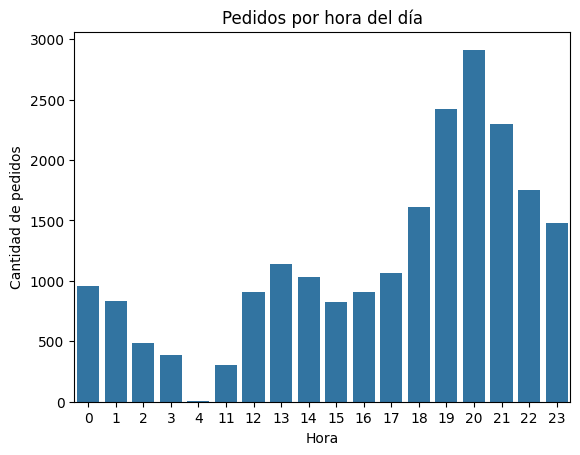

In [24]:
df_clean['Hora'] = df_clean['Order Placed At'].dt.hour # Extraemos la hora de la columna 'Order Placed At'
sns.countplot(data=df_clean, x='Hora')
plt.title('Pedidos por hora del día')
plt.ylabel('Cantidad de pedidos')
plt.show()

Se observa que la mayoría de los pedidos se concentran entre las 19:00 y las 21:00 horas. Por lo tanto, sería recomendable que los restaurantes refuercen su personal durante este rango horario para optimizar la atención y los tiempos de entrega.

---

#### ¿Qué días de la semana se realizan más pedidos y cuáles menos?

##### 2. Pedidos por día de la semana.



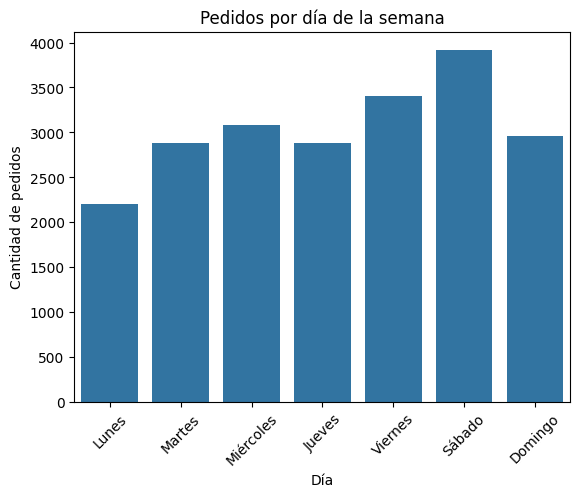

In [25]:
df_clean['Día'] = df_clean['Order Placed At'].dt.day_name()
sns.countplot(data=df_clean, x='Día', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'], rotation=45)
plt.title('Pedidos por día de la semana')
plt.ylabel('Cantidad de pedidos')
plt.show()

Como se puede observar en el gráfico, los lunes presentan la menor cantidad de pedidos, mientras que los viernes, sábados y domingos concentran la mayor demanda. 
Esto indica que la actividad laboral en los servicios de entrega debería reforzarse especialmente durante el fin de semana.

---

#### ¿Comó son los tiempos de espera en relación con la distancia? 

##### 3. Relación entre distancia y tiempo de espera.

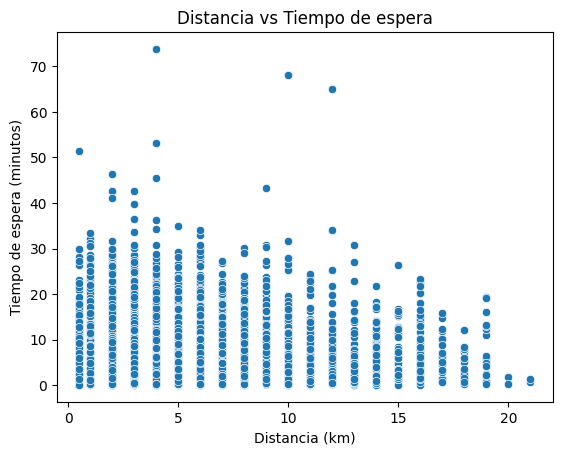

In [23]:

sns.scatterplot(data=df_clean, x='Distance', y='Rider wait time (minutes)')
plt.title('Distancia vs Tiempo de espera')
plt.xlabel('Distancia (km)')
plt.ylabel('Tiempo de espera (minutos)')
plt.show()

En distancias cortas, se registran mayores tiempos de espera, mientras que en las distancias largas, los tiempos tienden a ser menores. Esto podría indicar que los pedidos lejanos son gestionados con mayor eficiencia logística que los pedidos cercanos, quizas por tener menor prioridad o una preparación más relajada.

---